In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


### Loading Data

In [2]:
spam_df = pd.read_csv("C:/Users/AKASH HN/Downloads/Dataset/spam.csv", encoding='latin-1')
spam_df = spam_df[['v2', 'v1']]
spam_df.columns = ['Text', 'Label']
spam_df.head()

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [3]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5572 non-null   object
 1   Label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
spam_df.describe()

,Text,Label
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


### Distribution of class

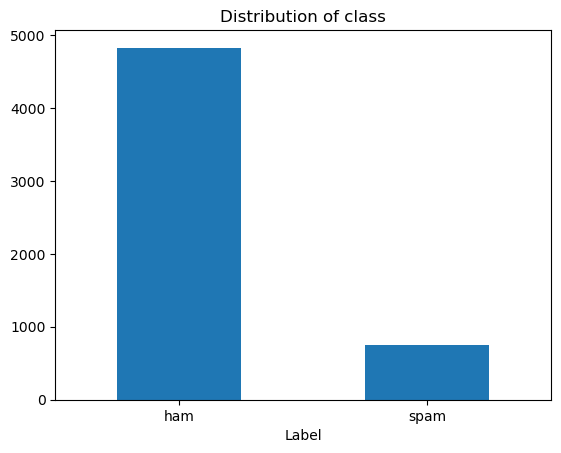

In [5]:
spam_df['Label'].value_counts().plot.bar(rot = 0)
plt.title('Distribution of class')
plt.show()

### Word Cloud of spam and ham texts

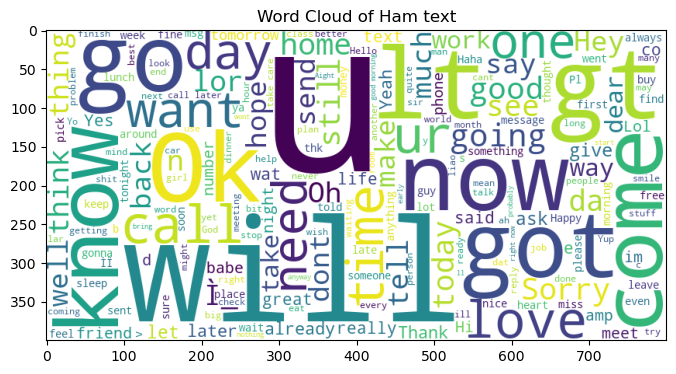

In [6]:
ham = spam_df[spam_df['Label'] == 'ham']
ham_text = "  ".join(ham['Text'].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(ham_text)
plt.figure(figsize = (8,6))
plt.imshow(wordcloud)
plt.title('Word Cloud of Ham text')
plt.show()

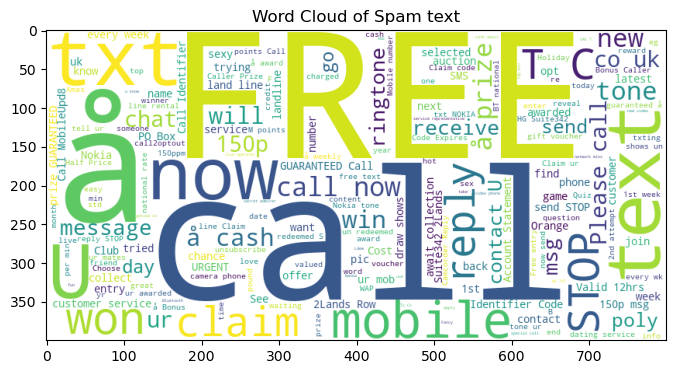

In [9]:
spam = spam_df[spam_df['Label'] == 'spam']
spam_text = "".join(spam['Text'].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(spam_text)
plt.figure(figsize = (8,6))
plt.imshow(wordcloud)
plt.title('Word Cloud of Spam text')
plt.show()

### Label encoding and Splitting Data

In [10]:
encoder = LabelEncoder()
spam_df['Label'] = encoder.fit_transform(spam_df['Label'])
X = spam_df['Text']
y = spam_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=  42)

### Word to vector

In [11]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)

### SVM Classifier

In [12]:
clf = SVC()
clf.fit(x_train_vec.toarray(),y_train)

SVC()

In [13]:
print('Accuracy of SVM Model')
x_pred = clf.predict(x_train_vec.toarray())
print(f'Train accuracy: {accuracy_score(y_train, x_pred):.2%}')
y_pred = clf.predict(x_test_vec.toarray())
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.2%}')

Accuracy of SVM Model
Train accuracy: 99.71%
Test accuracy: 97.94%


### Multinomial naive bayes

In [14]:
model = MultinomialNB()
model.fit(x_train_vec, y_train)

MultinomialNB()

In [15]:
print('Accuracy of MultinomialNB')
x_pred = model.predict(x_train_vec)
print(f'Train accuracy: {accuracy_score(y_train, x_pred):.2%}')
y_pred = model.predict(x_test_vec)
print(f'Test accccuracy: {accuracy_score(y_test, y_pred):.2%}')

Accuracy of MultinomialNB
Train accuracy: 99.44%
Test accccuracy: 98.39%


In [16]:
#"Hi Team,This is a reminder for our project update meeting scheduled for tomorrow at 10:00 AM. Please ensure you have your progress reports ready for discussion. Looking forward to seeing you all."

#"Dear Valued Customer, We have detected suspicious activity on your account. To protect your information, please verify your account details immediately by clicking the link below: Verify Account Now .Failure to do so may result in your account being suspended."

#### Prediction for new data

In [17]:
new_mail = ["Hi Team,This is a reminder for our project update meeting scheduled for tomorrow at 10:00 AM. Please ensure you have your progress reports ready for discussion. Looking forward to seeing you all."]
new_mail_vec = vectorizer.transform(new_mail)
new_pred = model.predict(new_mail_vec)
print(f'This email is {"Spam" if new_pred else "Ham"}')

This email is Ham
